<h1>Chapter 3 | Case Study A3 | <b>Finding a Good Deal among Hotels: Data Exploration</b></h1>
<p>In this notebook, I'll be taking notes of the author's code on the referred case study. The goal is to learn more about how to plot decent charts considering features such as usage, encoding, scaffolding, and annotation.</p>
<h2>1. Read the data</h2>

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format

from plotnine import *

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# Location folders
data_in = f"{dirname}da_data_repo/hotels-vienna/clean/"
data_out = f"{dirname}da_case_studies/ch03-hotels_vienna_explore/"
output = f"{dirname}da_case_studies/ch03-hotels_vienna_explore/output/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [4]:
# Import the prewritten helper functions
from py_helper_functions import *

<p>We can load our <code>hotels-vienna</code> dataset.</p>

In [5]:
vienna = pd.read_csv(f"{data_in}hotels-vienna.csv")

<h2>2. Describing distributions</h2>
<p>We will now Figures 1a and 1b. We will start by focusing on the distribution of stars as a measure of hotel quality. We first need to filter out observations that are not related to <b>hotels</b>, as our ultimate goal is to get a good deal on this accommodation category.</p>

In [6]:
# Filter hotels
vienna["accommodation_type"].value_counts()

Hotel                  264
Apartment              124
Pension                 16
Guest House              8
Hostel                   6
Bed and breakfast        4
Apart-hotel              4
Vacation home Condo      2
Name: accommodation_type, dtype: int64

In [7]:
vienna_cut = vienna.loc[lambda x: x["accommodation_type"] == "Hotel"]

In [8]:
vienna_cut["accommodation_type"].value_counts()

Hotel    264
Name: accommodation_type, dtype: int64

<p>Ok! We can now plot figures 1a and 1b.</p>

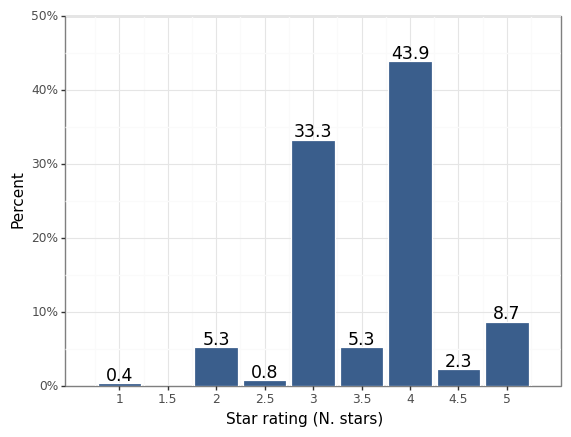

<ggplot: (129797630088)>

In [9]:
ggplot(vienna_cut, aes(x="stars", y="stat(count)/sum(stat(count))")) + geom_bar(
    color="white", fill=color[0], alpha=0.8
) + labs(x="Star rating (N. stars)", y="Percent") + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0.5, 5.5], breaks=seq(1, 5.1, 0.5)
) + scale_y_continuous(
    expand=[0.00, 0.00],
    limits=[0, 0.5],
    breaks=seq(0, 0.51, 0.1),
    labels=percent_format(),
) + geom_text(
    aes(
        x="stars",
        y="[x+0.01 for x in stat(count)/sum(stat(count))]",
        label="[round(num,1) for num in stat(count)/sum(stat(count))*100)]"
    ),
    stat="count",
    size=12.5
) + theme_bw()

<hr>
<p><b>Figure 3.1a</b> Histogram of hotel stars, relative frequency (percent)

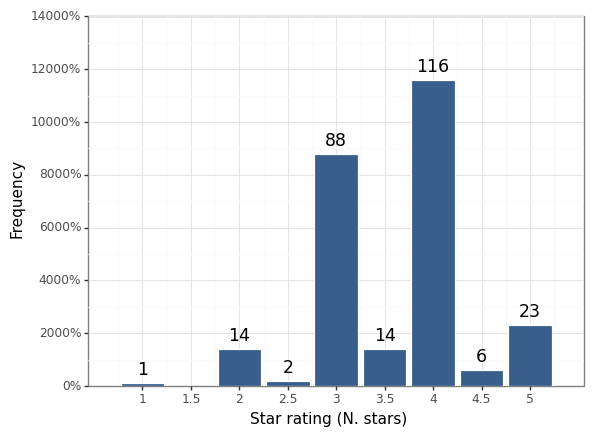

<ggplot: (129799952009)>

In [10]:
ggplot(vienna_cut, aes(x="stars", y="stat(count)")) + geom_bar(
    color="white", fill=color[0], alpha=0.8
) + labs(x="Star rating (N. stars)", y="Frequency") + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0.5, 5.5], breaks=seq(1, 5.1, 0.5)
) + scale_y_continuous(
    expand=[0.00, 0.00],
    limits=[0, 140],
    breaks=seq(0, 141, 20),
    labels=percent_format(),
) + geom_text(
    aes(
        x="stars",
        y="[x+5 for x in stat(count)]",
        label="stat(count)"
    ),
    stat="count",
    size=12.5
) + theme_bw()

<hr>
<p><b>Figure 3.1b</b> Histogram of hotel stars, absolute frequency (count)</p>
<p>What can we get from these charts? Well, there are 88 hotels with 3 stars, 14 with 3.5 stars, and 116 with 4 stars. Relatively, this means 33.3%, 5.3%, and 43.9% of all observations, respectively. Summing all these percentages, we would get more than 80% of the hotels falling under the 3 to 4 stars interval.</p>
<p>We can then work with only this fraction of the dataset. We will exclude hotels below and above 3 to 4 stars.We will also exclude those that are more than 8miles away from the center and extreme euro prices, as we did in the previous chapter.</p>

In [11]:
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel") &
    (vienna["city_actual"] == "Vienna") &
    (vienna["stars"] >= 3) &
    (vienna["stars"] <= 4) &
    (~vienna["stars"].isnull()) &
    (vienna["price"] <= 600)
]

In [12]:
vienna_cut["city"].value_counts()

Vienna    207
Name: city, dtype: int64

<p>Perfect, we got the correct sample size, with N=207.</p>
<p>Our next goal is to analyse <b>hotel room price</b>. First, let's take a look at the range of values in this variable.</p>

In [13]:
vienna_cut.groupby("city").agg(
    mean=("price", "mean"),
    min=("price", "min"),
    max=("price", "max"),
    n=("price", "size"),

)

,mean,min,max,n
city,,,,
Vienna,109.975845,50,383,207


<p>We have prices ranging from $50 to $383 for a sample with N=207. Now, we can visualize each of these values in a histogram, but how would that look? We probably won't get a good visualization of this distribution, but let's reproduce the book's charts to see why.</p>

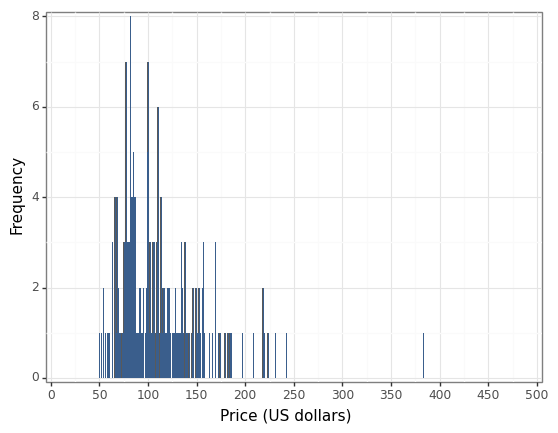

<ggplot: (129799859191)>

In [14]:
# Figure 3.2a

ggplot(vienna_cut, aes(x="price")) + geom_histogram(
    y="stat(count)/sum(stat(count))", binwidth=1, size=0.5
) + geom_histogram(
    binwidth=1, fill=color[0], size=0.5, alpha=0.8, boundary=0, closed="left"
) + labs(
    x="Price (US dollars)", y="Frequency"
) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 500], breaks=seq(0, 501, 50)
) + scale_y_continuous(
    expand=[0.01, 0.01]
) + theme_bw()

<hr>
<p><b>Figure 3.2a</b> Histogram of hotel price, each value separately</p>
<p>As we can see, this figure does not tell us much. We can see the distribution, but because it is so granular, it becomes difficult to estimate it with more accuracy. We can see, for instance, that one value registered 8 observations, but it gets difficult to estimate which precise value. Let's plot another graph, this time, binned using $10 intervals.</p>

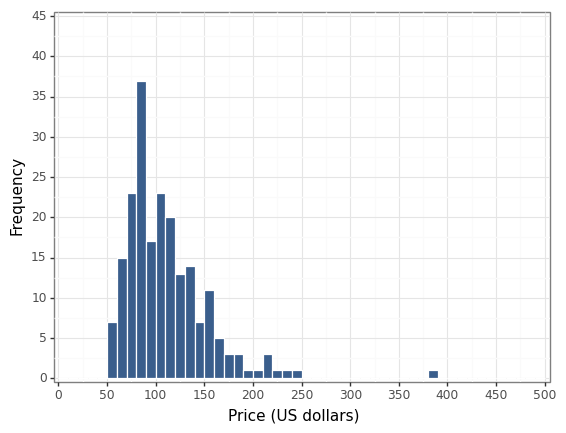

<ggplot: (129797633619)>

In [15]:
# Figure 3.2b

ggplot(vienna_cut, aes(x="price")) + geom_histogram(
    y="stat(count)/sum(stat(count))", binwidth=10, fill=color[0], color="white", boundary=0, closed="left"
) + labs( x="Price (US dollars)", y="Frequency"
) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 500], breaks=seq(0, 501, 50)
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 45], breaks=seq(0, 46, 5)
) + theme_bw()

<hr>
<p><b>Figure 3.2b</b> Histogram of hotel price, 10-dollar wide bins</p>
<p>Now we are getting somewhere. We can observe a higher concentration of observations between $60 and $180, with some values above that and widely distributed. Because the mean is $109 and the mode is at the $80 bin, we can think about a skewed distribution, with a long tail to the right. Indeed, there are some vaues on the right end of the histogram, and they are far away from its center - one $380 value is more than $270 above the mean and $310 above the mode.</p>
<p>We can increase the bin width to reduce the number of bars. Let's do this now.</p>

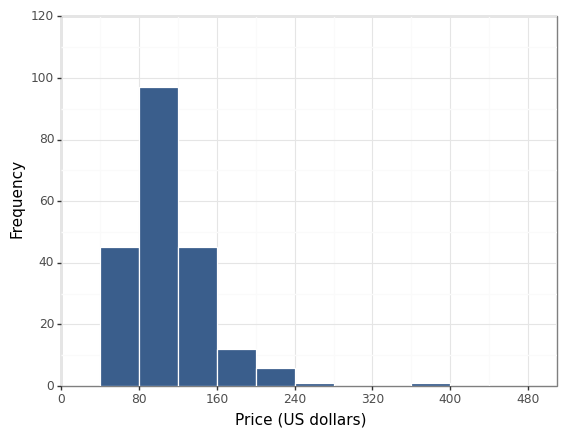

<ggplot: (129800076120)>

In [16]:
# Figure 3.3a

ggplot(vienna_cut, aes(x="price")) + geom_histogram(
    y="stat(count)/sum(stat(count))", binwidth=40, fill=color[0], color="white", boundary=0, closed="left"
) + labs(x="Price (US dollars)", y="Frequency"
) + scale_x_continuous(
    expand=[0.0, 0.0], limits=[0, 510], breaks=seq(0, 501, 80)
) + scale_y_continuous(
    expand=[0.00, 0.0], limits=[0, 120], breaks=seq(0, 121, 20)
) + theme_bw()

<hr>
<p><b>Figure 3.3a</b> Histogram of hotel price, 40-dollar wide bins</p>
<p>We can see the same skewness pattern, but now, with values lumped together in wider bins. As we increase the size of bins, however, we lose a bit of the gradual decline in frequency. Take a look at the following histogram, binned using a $80 interval.</p>

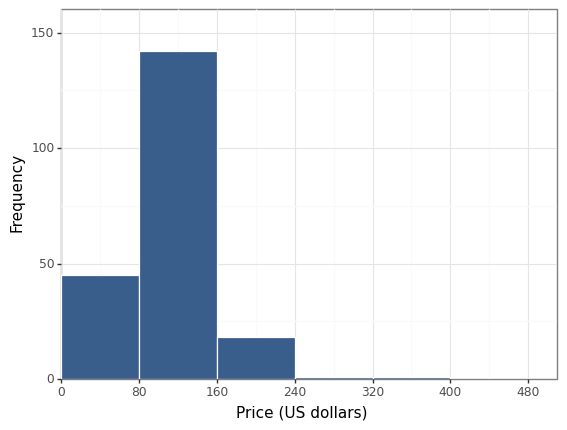

<ggplot: (129800082318)>

In [17]:
# Figure 3.3b

ggplot(vienna_cut, aes(x="price")) + geom_histogram(
    y="stat(count)/sum(stat(count))", binwidth=80, fill=color[0], color="white", boundary=0, closed="left"
) + labs(x="Price (US dollars)", y="Frequency"
) + scale_x_continuous(
    expand=[0.0, 0.0], limits=[0, 510], breaks=seq(0, 501, 80)
) + scale_y_continuous(
    expand=[0.00, 0.0], limits=[0, 160], breaks=seq(0, 151, 50)
) + theme_bw()

<hr>
<p><b>Figure 3.3b</b> Histogram of hotel price, 80-dollar wide bins</p>
<p>In this case, we can see the mode clearly defined between the 80-160 range. We lose, however, the declining trend shown in more granular views. Basically, our estimates remain the same, and choosing the bin size depends on our goals. If details matter, a smaller range is the right choice.</p>

<h2>3. Extreme Values</h2>
<p>Let's move on to the other part of our study. This time, we will deal with extreme values, how to identify and properly handle them using visual techniques. We will distinguish errors from extreme yet valid observations. Hotel price will be our y variable, while distance to city center will be our x variable.</p>
<p>For now, we will tackle <b>distance</b>. Let's filter the dataset and keep hotels between 3 to 4 stars no matter how far they are from the city center.</p> 

In [18]:
# Filter values
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel") &
    (vienna["stars"] >= 3) &
    (vienna["stars"] <= 4) &
    (~vienna["stars"].isnull()) &
    (vienna["price"] <= 1000)
]

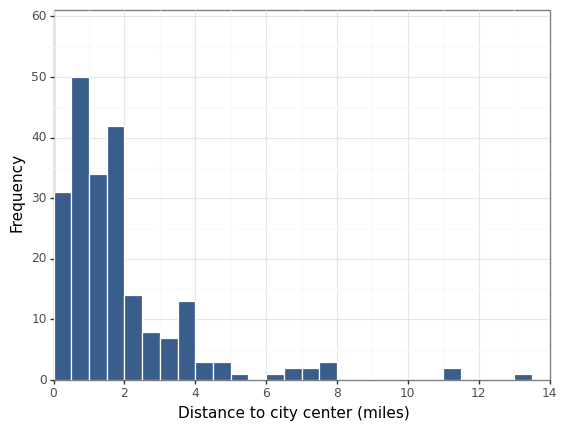

<ggplot: (129800264248)>

In [19]:
# Figure 3.4
ggplot(vienna_cut, aes(x="distance")) + geom_histogram(
    y="stat(count)/sum(stat(count))", binwidth=0.5, fill=color[0], color="white", boundary=0, closed="left"
) + labs(x="Distance to city center (miles)", y="Frequency") + scale_x_continuous(
    expand=[0.0, 0.0], limits=[0, 14], breaks=seq(0, 15, 2)
) + scale_y_continuous(
    expand=[0.0, 0.0], limits=[0, 61], breaks=seq(0, 61, 10)
) + theme_bw()

<hr>
<p><b>Figure 3.4</b> Histogram of distance to the city center</p>
<p>We used a 0.5-mile bin on the x axis, which resulted in an unven distribution. Our goal was to identify extreme values, so we are not concerned with this outcome right now. What we want to highlight, however, is the number of hotels that are above a distance of <b>8 miles</b>. Remember, our goal is to find <b>cheap hotels relatively to how close they are to the city center</b>. A cheap hotel at a 14-mile distance won't do! So, we have <b>three</b> observations above a distance of 8 miles. They are <b>not</b> errors, but we will drop them later on. We also don't want to drop the hotels within a 6 to 8-mile range (observe the concentration of observations at the histogram for such distances), as we would like to associate these hotels with other variables, mainly, price, but also quality, to assess whether their distance is justifiable by other reasons (a cheap hotel with a good quality at a reasonable distance, for instance).</p>
<p>To illustrate our findings so far, let's make some <b>annotations</b> and improve our histogram. Our goal is to highlight that are too far from the city center, so that we can justify our analytical choices. This part reproduces <b>Case study 3.A3 - The anatomy of a graph</b>. We will focus on reviewing some guidelines for a good data visualization.</p>

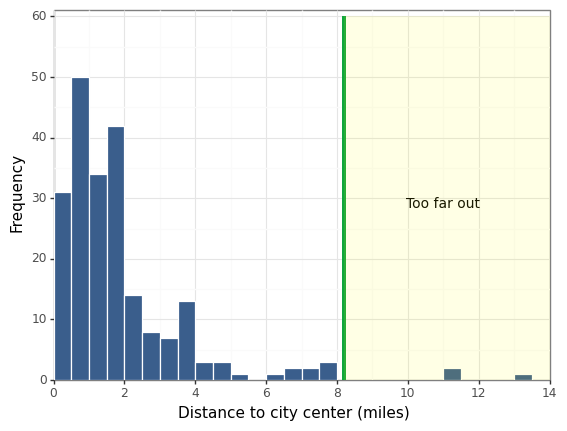

<ggplot: (129800375089)>

In [20]:
# Figure 3.5 (Figure 3.4 + annotation)
ggplot(vienna_cut, aes(x="distance")) + geom_histogram(
    y="stat(count)/sum(stat(count))",
    binwidth=0.5,
    fill=color[0],
    color="white",
    boundary=0,
    closed="left",
) + labs(x="Distance to city center (miles)", y="Frequency") + scale_x_continuous(
    expand=[0.0, 0.0], limits=[0, 14], breaks=seq(0, 15, 2)
) + scale_y_continuous(
    expand=[0.0, 0.0], limits=[0, 61], breaks=seq(0, 61, 10)
) + geom_segment(
    aes(x=8.2, y=0, xend=8.2, yend=60), color=color[1], size=1
) + annotate(
    "text", x=11, y=29, label="Too far out", size=10
) + annotate(
    geom="rect", xmin=8.2, xmax=14, ymin=0, ymax=60, alpha=0.1, fill="yellow"
) + theme_bw()


<hr>
<p><b>Figure 3.5</b> Histogram of distance to the city center</p>
<p>Now, let's take a look at some attributes that make this histogram useful to our analysis:</p>
<ul>
<li><b>Usage</b>. We used this chart to identify and document extreme values. As such, we highlighted the hotels that were located more than 8 miles away from the city center, separating them from the rest of the hotels.</li>
<li><b>Encoding</b>. We used a histogram, in which the height informs the frequency of observations under a certain bin range. It shows the main part of our distribution yet it also sets the extreme values apart, making it useful to identify such observations. Because the bar height is enough to distinguish the number of observations and extreme values, we used a single color to encode this information.</li>
<li><b>Scaffolding</b>. We identified the histogram, labeling each axis properly. To improve readability, the x-axis, which consists of 0.5-mile bins, was labeled for every 2 miles. Moreover, horizontal and vertical lines were added to help reading off numbers.</li>
<li><b>Annotation</b>. We used a series of visual attributes to make sure that the user can identify our findings. First, we added a green, thicker, vertical line that splits the visualization into two parts. The area above the 8-mile line was also colored, which assists on highlighting the extreme values above this threshold. Finally, we added a written note, which states that the hotels in the highlighted area were too distant from the city centre.</li>
</ul>
<p>Now, we can take a look the <code>city_actual</code> variable to find out where these hotels really are. Are they all in Vienna?</p>

In [21]:
vienna_cut["city_actual"].value_counts()

Vienna        207
Schwechat       7
Voesendorf      2
Fischamend      1
Name: city_actual, dtype: int64

<p>As we can see, 10 hotels are in villages, such as in Fischamend. We can drop them in our next step. We can also apply the other filters that we had used, such as number of stars and less than 8 miles from center.</p>

In [26]:
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel") &
    (vienna["stars"] >= 3) &
    (vienna["stars"] <= 4) &
    (~vienna["stars"].isnull()) &
    (vienna["distance"] < 8.0) &
    (vienna["city_actual"] == "Vienna") &
    (vienna["price"] <= 1000)
    ]

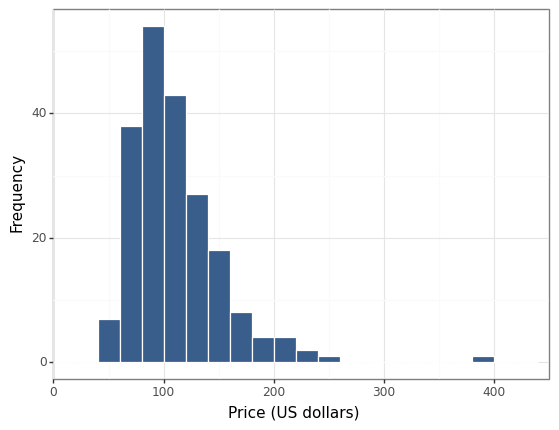

<ggplot: (129801589989)>

In [35]:
ggplot(vienna_cut, aes(x="price")) + geom_histogram(
    y="stat(count)/sum(count))", binwidth=20, fill=color[0], color="white", boundary=0, closed="left"
) + labs(x="Price (US dollars)", y="Frequency") + scale_x_continuous(
    expand=[0.00, 0.00], limits=[0, 450], breaks=seq(0, 450, 100)
) + expand_limits(
    x=0.00, y=0.00
) + theme_bw()

<p>And here's our histogram without extreme values. We dropped the observations for hotels that were not in Vienna, as well as those with prices above 1000 usd. </p>
<h2>4. Conclusion</h2>
<p>We came a long way. We reviewed important concepts on how to plots that convey relevant findings from our analysis. We also visualized our dataset using different bin distributions and applied different techniques to improve and adapt our visualizations to our needs, which were here related to finding extreme values. Finally, we cleaned the data to get a view of the distribution excluding extreme or unecessary data. It is important to mention, however, that extreme values hold a <b>subjective</b> component. That is, given our goal, we deeemed such values as extreme because they are not relevant. In different situations, their classification could be something else.</p>
<hr>